In [83]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, ElasticNet

Linear Regression with Regularization

In [84]:
housing = pd.read_fwf("https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data", header = None)

In [85]:
housing.describe().T

,count,mean,std,min,25%,50%,75%,max
0,506.0,1.716290,2.653510,0.00632,0.0819,0.250895,2.326718,9.96654
1,506.0,11.363636,23.322453,0.00000,0.0000,0.000000,12.500000,100.00000
2,506.0,11.136779,6.860353,0.46000,5.1900,9.690000,18.100000,27.74000
3,506.0,0.069170,0.253994,0.00000,0.0000,0.000000,0.000000,1.00000
4,506.0,0.554695,0.115878,0.38500,0.4490,0.538000,0.624000,0.87100
5,506.0,6.284634,0.702617,3.56100,5.8855,6.208500,6.623500,8.78000
6,506.0,68.574901,28.148861,2.90000,45.0250,77.500000,94.075000,100.00000
7,506.0,3.696228,1.999689,0.58570,2.0737,3.107300,5.112625,9.22290
8,506.0,4.332016,1.417166,1.00000,4.0000,4.000000,5.000000,8.00000
9,506.0,408.237154,168.537116,187.00000,279.0000,330.000000,666.000000,711.00000


In [40]:
linear = LinearRegression()
regularized = ElasticNet(alpha = 10, l1_ratio = 0.5)

In [105]:
attributes = housing.iloc[:, :-1]
labels = housing.iloc[:, :-1]
linear.fit(attributes, labels)
print(linear.coef_)

regularized.fit(attributes, labels)
print(regularized.coef_)

[[  1.00000000e+00  -4.62815724e-19  -3.54914249e-17   3.81203733e-16
   -9.40070602e-16  -3.57063281e-17  -3.82132371e-17   2.80448711e-16
    1.82009161e-16   3.17178575e-17   1.59873801e-16   2.53113960e-17
    1.64507679e-17]
 [  1.69417252e-14   1.00000000e+00  -2.35922393e-15   1.80411242e-14
    1.11244347e-13   4.44089210e-16  -2.51534904e-16   4.57966998e-16
    1.64126525e-15   4.59701721e-17   5.16947596e-16   1.11022302e-16
    4.12864187e-16]
 [ -8.09517268e-16  -7.00828284e-16   1.00000000e+00  -3.96904731e-15
    3.16968674e-14   2.66453526e-15  -5.55111512e-16   5.55111512e-16
    2.28983499e-16   4.51028104e-17   2.77555756e-17  -7.63278329e-17
   -2.39391840e-16]
 [  2.81016603e-16  -1.83782433e-16  -3.62123526e-16   1.00000000e+00
   -2.27214081e-14  -9.02056208e-17   1.66533454e-16   3.67761377e-16
   -2.22044605e-16   1.66533454e-16   8.32667268e-17   1.11022302e-16
    1.11022302e-16]
 [  2.01399847e-16  -7.32920669e-17   4.33680869e-18  -7.07767178e-16
    1.0000

Logistic Regression with Regularization

In [101]:
iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
iris.columns = ["sepal lenght", "sepal width", "petal lenght", "petal width", "class"]
iris.head()

,sepal lenght,sepal width,petal lenght,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C = 1000)
model.fit(iris_attributes, iris_labels)

model2 = LogisticRegression(C = 0.001)
model2.fit(iris_attributes, iris_labels)

print(model.coef_)
print(model2.coef_)

[[  1.23447535   4.11821962  -6.5325072   -3.18715121]
 [ -0.24642288  -2.77165187   1.29541375  -2.69962978]
 [ -2.74173867  -5.43038356   7.64430752  14.01832537]]
[[-0.04348189  0.01262464 -0.10492563 -0.04312338]
 [-0.04640808 -0.04148572 -0.00621299 -0.00336127]
 [-0.04749163 -0.04712036  0.03258157  0.02282612]]


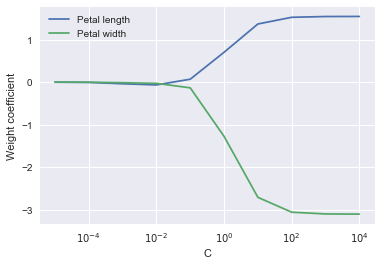

In [87]:
attributes, labels = iris[[2, 3]], iris[[4]]
weights, params = [], []
for c in np.arange(-5, 5):
    model = LogisticRegression(C = 10**c)
    model.fit(attributes, labels.values.ravel())
    weights.append(model.coef_[1]) # Display only the second class
    params.append(10**c)
weights = np.array(weights)
plt.plot(params, weights[:, 0], label = "Petal length")
plt.plot(params, weights[:, 1], label = "Petal width")
plt.xlabel("C")
plt.ylabel("Weight coefficient")
plt.xscale("log")
plt.legend()

Model Testing

In [69]:
from sklearn.model_selection import train_test_split
attr_train, attr_test, l_train, l_test = train_test_split(attributes, labels, train_size = 0.7)

In [72]:
model = LogisticRegression(C = 1000)
model.fit(attr_train, l_train.values.ravel())

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
model.score(attr_test, l_test)

0.9555555555555556

In [77]:
predicted = model.predict(attr_test)
r = predicted - l_test
# predicted - estimated

TypeError: unsupported operand type(s) for -: 'str' and 'str'

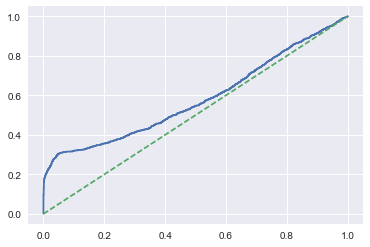

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve

adult = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data", header = None)   
model = LogisticRegression(C = 1000)
attributes = pd.get_dummies(adult.iloc[:, :-1])
labels = LabelEncoder().fit_transform(adult.iloc[:, -1])
attr_train, attr_test, l_train, l_test = train_test_split(
  attributes, labels, train_size = 0.8, stratify = labels)
model.fit(attr_train, l_train)
predicted = model.predict_proba(attr_test)[:, 1]
fpr, tpr, _ = roc_curve(l_test, predicted)
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle = "--")

In [89]:
model.score(attr_test, l_test)

0.80085981882389068

In [92]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

kfold = StratifiedKFold(n_splits = 5)
scores = cross_val_score(model, attributes, labels, cv = kfold)
scores

array([ 0.79671426,  0.79407248,  0.80006143,  0.79576167,  0.79960074])

In [ ]:
# the values from below are close to each other, so the model is good (not under or overfitting)

In [93]:
# Hyperparameter Tuning

from sklearn.model_selection import GridSearchCV

tuned_params = [{"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],   "penalty": ["l1", "l2"]}]
grid = GridSearchCV(LogisticRegression(C = 1), tuned_params)
grid.fit(attr_train, l_train)
print(grid.best_params_) # Estimator: grid.best_estimator_


{'C': 1, 'penalty': 'l1'}


PCA

[ 4.19667516  0.24062861  0.07800042  0.02352514]


<Container object of 4 artists>

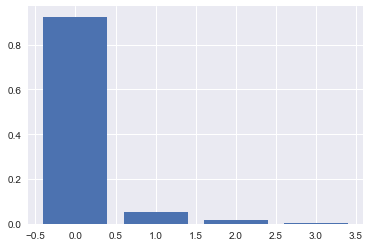

In [95]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(iris.iloc[:, :-1])
print(pca.explained_variance_)
plt.bar(list(range(len(pca.components_))), pca.explained_variance_ratio_)

Isomap

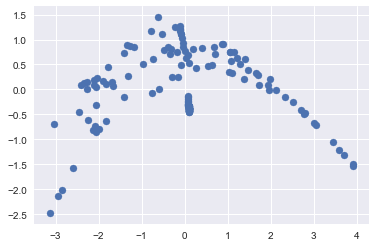

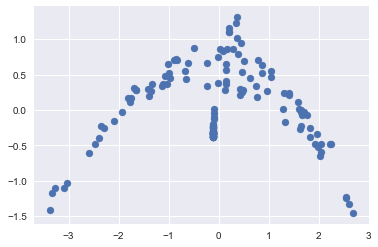

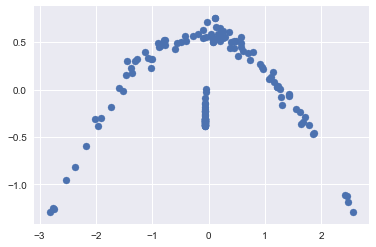

In [98]:
from sklearn.manifold import Isomap

iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None)
iris_attr = iris.iloc[:, :-1]

isomap = Isomap(n_neighbors = 3, n_components = 2)
data = isomap.fit_transform(iris_attr)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

isomap = Isomap(n_neighbors = 5, n_components = 2)
data = isomap.fit_transform(iris_attr)
plt.scatter(data[:, 0], data[:, 1])
plt.show()

isomap = Isomap(n_neighbors = 10, n_components = 2)
data = isomap.fit_transform(iris_attr)
plt.scatter(data[:, 0], data[:, 1])
plt.show()